## Select Anchor Box for given Dataset

In [ ]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist

In [ ]:
!unzip -q labels.zip

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['Width', 'Height'])
df

,Width,Height


In [ ]:
!cat labels/00bf37cdc7ae8d10.txt  #class_id,x,y,w,h

1 0.5301865 0.565885 0.9392389999999999 0.8132780000000001


In [ ]:
import glob2
filelist = glob2.glob("labels/*txt")
index = 0

for myfile in filelist:
    file_open = open(myfile,'r').read().splitlines()
    for line in file_open:
        params = line.split(" ")
        width  = params[3]
        height = params[4]
        df.loc[index] = [width,height]
        index +=1

In [ ]:
df.head(10)

,Width,Height
0,1.0,0.774893
1,0.954415,0.39250199999999996
2,0.549857,0.7136530000000001
3,0.85505,0.804901
4,0.999231,0.999854
5,0.903372,0.36330699999999994
6,0.9411280000000001,0.688724
7,0.9854839999999999,0.45038600000000006
8,1.0,0.695664
9,0.47546399999999994,0.794102


In [ ]:
X = df.to_numpy()
X = X.astype('float64')
X.dtype
X[:10]

array([[1.      , 0.774893],
       [0.954415, 0.392502],
       [0.549857, 0.713653],
       [0.85505 , 0.804901],
       [0.999231, 0.999854],
       [0.903372, 0.363307],
       [0.941128, 0.688724],
       [0.985484, 0.450386],
       [1.      , 0.695664],
       [0.475464, 0.794102]])

## Decide suitable number of anchor 

In [ ]:
import numpy as np

# Given centroids find the maximum IOU of a bbox
def maximum_iou(box, centroids):
    x = np.minimum(np.exp(centroids[:, 0]), np.exp(box[0]))
    y = np.minimum(np.exp(centroids[:, 1]), np.exp(box[1]))

    intersection = x * y
    box_area = np.exp(box[0]) * np.exp(box[1])
    centroid_area = np.exp(centroids[:, 0]) * np.exp(centroids[:, 1])

    iou_ = intersection / (box_area + centroid_area - intersection)
    #return iou_
    return (np.max(iou_), np.argmax(iou_))


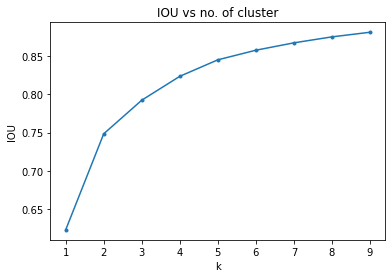

In [ ]:
IOU=[]
centroids = {}

K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    centroids[k] = kmeanModel.cluster_centers_
    maxiou = np.array([maximum_iou(b, centroids[k])  for b in X])
    iou_avg = np.mean(maxiou[:, 0])
    IOU.append(iou_avg)

# Plot the elbow
plt.plot(K, IOU,'.-')
plt.xlabel('k')
plt.ylabel('IOU')
plt.title('IOU vs no. of cluster')
plt.show()

##  Visualize anchor_bbox dimesion for Selected Number of Anchor (K=3)


In [ ]:
centroids[3]

array([[0.18547305, 0.15784538],
       [0.89261096, 0.63258077],
       [0.49992282, 0.55533295]])

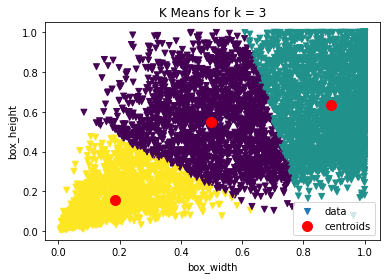

In [ ]:
cl3 = KMeans(3)
cl3.fit(X)

plt.scatter(list(X[:,0]), list(X[:,1]), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.legend()
plt.xlabel('box_width')
plt.ylabel('box_height')
plt.title('K Means for k = 3')
plt.legend()
plt.show()

In [ ]:
img_size =320
k = 3 # selected num_anchor box
anchors = (centroids[k] * img_size).astype('int32')
print("anchors",anchors)

anchors [[ 59  50]
 [285 202]
 [159 177]]


In [ ]:
anchors = [
           [[ 59 , 50]],
           [[159 , 177]],
           [[285 , 202]]
           ]
print("Selected Anchors for 320x320 resized Image \n",anchors)

Selected Anchors for 320x320 resized Image 
 [[[59, 50]], [[159, 177]], [[285, 202]]]
